In [ ]:
"""
Questão 1: Contagem de Objetos com OpenCV
===========================================
Objetivo: Contar grãos de arroz em imagem com alta iluminação

"""

**Carregando a Imagem**

In [ ]:
img_path = Path("/content/q1.png")
img = cv2.imread(str(img_path))

**Carregamento e importação**

In [ ]:
!pip -q install opencv-python numpy matplotlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

**Funções**  (ROI + Segmentação + Watershed)




In [ ]:
def crop_roi(bgr):
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    _, inv = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

    k = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    inv = cv2.morphologyEx(inv, cv2.MORPH_OPEN, k, iterations=1)

    cnts, _ = cv2.findContours(inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    return bgr[y:y+h, x:x+w]


def count_objects_watershed(roi_bgr, dt_factor=0.05):
    gray = cv2.cvtColor(roi_bgr, cv2.COLOR_BGR2GRAY)
    _, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    bw = cv2.morphologyEx(bw, cv2.MORPH_OPEN, k, iterations=1)
    bw = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, k, iterations=1)

    dist = cv2.distanceTransform(bw, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist, dt_factor * dist.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    sure_bg = cv2.dilate(bw, k, iterations=2)
    unknown = cv2.subtract(sure_bg, sure_fg)

    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    markers_ws = cv2.watershed(roi_bgr.copy(), markers)

    total = int(np.sum(np.unique(markers_ws) > 1))

    overlay = roi_bgr.copy()
    overlay[markers_ws == -1] = (0, 0, 255)

    return total, bw, overlay

def show(title, bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.imshow(rgb)
    plt.axis("off")
    plt.show()

**Criando ROI, Total, BW, Overlay**

In [ ]:
roi = crop_roi(img)
total, bw, overlay = count_objects_watershed(roi, dt_factor=0.05)

**ROI**

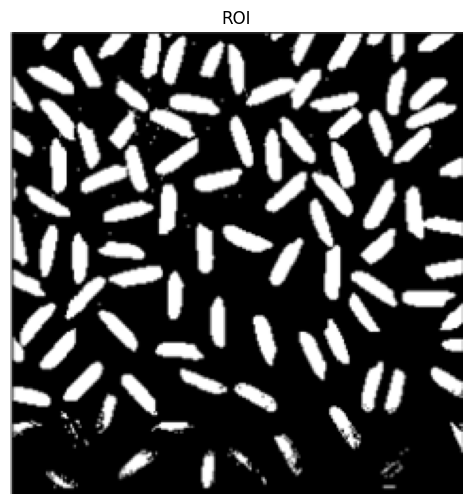

In [ ]:
show("ROI", roi)

**Aplicando Binarização**

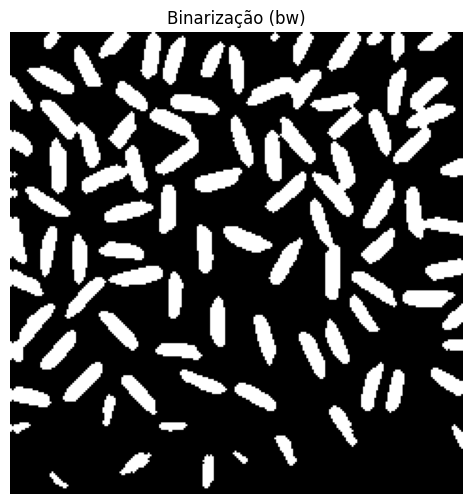

In [ ]:
show("Binarização (bw)", cv2.cvtColor(bw, cv2.COLOR_GRAY2BGR))

**Watershed**

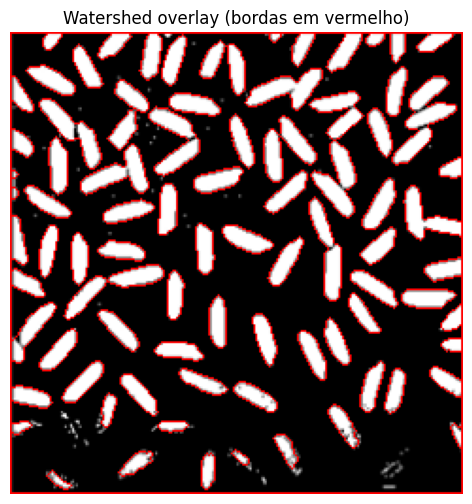

TOTAL_OBJETOS = 86


In [ ]:
show("Watershed overlay (bordas em vermelho)", overlay)

print("TOTAL_OBJETOS =", total)